In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
df=pd.read_csv('Relatorio.csv')
df

,Atleta ID,Tipo de atividade,Data,Distância,Calorias,Tempo,Cadência de corrida média,Cadência bicicleta média,Ritmo médio,Total de braçadas,Média de Swolf,Tempo em movimento,Velocidade
0,Bruna,Ciclismo em local fechado,2021-10-05 10:04:44,14170.0,567,3608.0,0,58,0,3384,0,3480.0,4.071839
1,Bruna,Ciclismo na montanha,2021-10-01 17:24:00,9700.0,201,2714.0,0,69,0,2740,0,2713.0,3.575378
2,Bruna,Ciclismo em estradas,2021-09-26 05:58:17,89970.0,"1,825",9024.0,0,74,0,11194,0,9020.0,9.974501
3,Bruna,Ciclismo em estradas,2021-09-25 07:16:25,15440.0,289,1800.0,0,77,0,2277,0,1798.0,8.587319
4,Bruna,Ciclismo em local fechado,2021-09-24 13:53:01,0.0,494,3306.0,0,74,0,4104,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,Bruna,Corrida,2017-11-08 08:01:32,31540.0,"1,672",8743.0,--,0,4:37,0,0,8735.0,3.610761
2473,Bruna,Corrida,2017-11-07 18:29:29,4420.0,242,1206.0,--,0,4:33,0,0,1206.0,3.665008
2474,Bruna,Corrida,2017-11-06 17:55:44,6520.0,323,2404.0,--,0,6:09,0,0,2399.0,2.717799
2475,Bruna,Corrida,2017-11-03 18:36:34,5970.0,290,2488.0,--,0,6:57,0,0,2481.0,2.406288


In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [4]:
df=df.dropna(how='all')

In [5]:
df['Data']=pd.to_datetime(df['Data'])

In [6]:
df_sw=df.loc[df['Tipo de atividade'].isin(['Corrida', 'Corrida em esteira']),['Data','Velocidade']]

In [7]:
df_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 1720 to 2476
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        757 non-null    datetime64[ns]
 1   Velocidade  732 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.7 KB


In [8]:
df_sw.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)

In [9]:
df['Velocidade'].value_counts()

0.000000    202
5.770956      2
1.056126      2
3.361345      2
1.042097      2
           ... 
1.073110      1
1.117943      1
3.813559      1
8.222310      1
1.099203      1
Name: Velocidade, Length: 2172, dtype: int64

In [10]:
df_sw['y'].sort_values()

1975    0.0
2458    0.0
2462    0.0
2465    0.0
2471    0.0
       ... 
1744    NaN
1745    NaN
1746    NaN
1747    NaN
1748    NaN
Name: y, Length: 757, dtype: float64

In [11]:
df_sw=df_sw.dropna()

In [12]:
model=Prophet()
model.fit(df_sw)

In [13]:
future = model.make_future_dataframe(periods=168)
future.tail()

,ds
895,2022-03-15 10:19:49
896,2022-03-16 10:19:49
897,2022-03-17 10:19:49
898,2022-03-18 10:19:49
899,2022-03-19 10:19:49


In [14]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-11-01 07:04:57,3.449438,2.224610,4.656490
1,2017-11-03 18:36:34,3.474343,2.293441,4.718280
2,2017-11-06 17:55:44,3.289836,2.066489,4.473433
3,2017-11-07 18:29:29,3.435177,2.182556,4.639793
4,2017-11-08 08:01:32,3.368070,2.180470,4.560027


In [15]:
df_sw.tail()

,ds,y
2472,2017-11-08 08:01:32,3.610761
2473,2017-11-07 18:29:29,3.665008
2474,2017-11-06 17:55:44,2.717799
2475,2017-11-03 18:36:34,2.406288
2476,2017-11-01 07:04:57,3.604051


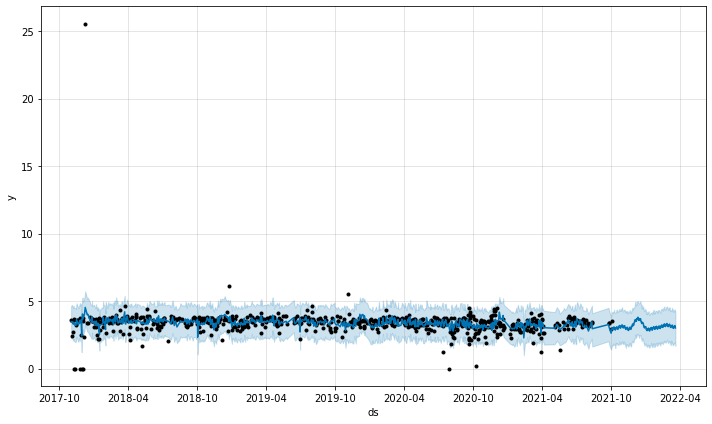

In [16]:
fig1 = model.plot(forecast)

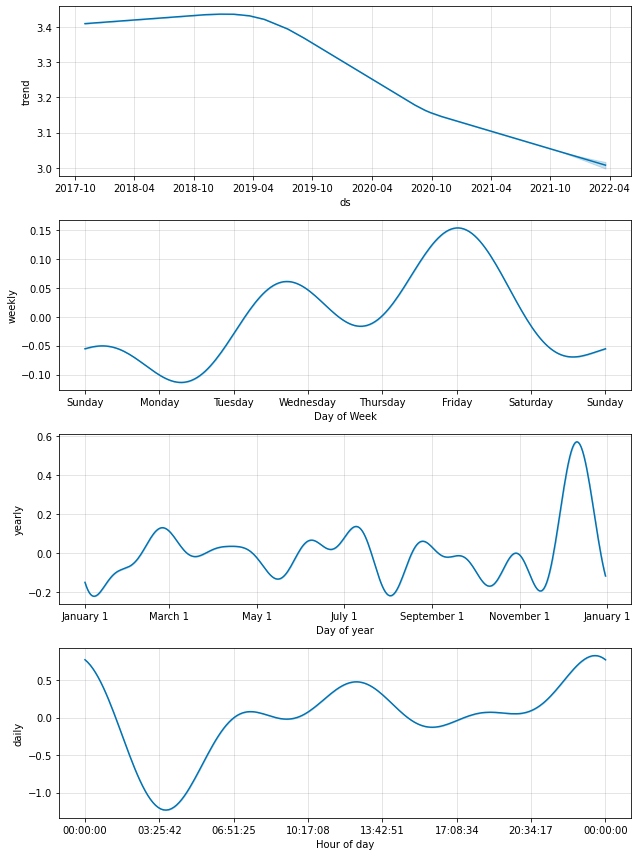

In [17]:
fig2 = model.plot_components(forecast)

In [19]:
df_sw2=df.loc[df['Tipo de atividade'].isin(['Corrida']),['Data','Velocidade']]
df_sw2.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_sw2=df_sw2.dropna()
model2=Prophet()
model2.fit(df_sw2)

In [20]:
future2 = model2.make_future_dataframe(periods=168)
future2.tail()

,ds
579,2022-03-13 05:50:14
580,2022-03-14 05:50:14
581,2022-03-15 05:50:14
582,2022-03-16 05:50:14
583,2022-03-17 05:50:14


In [21]:
forecast2 = model2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-11-01 07:04:57,3.727271,2.200273,5.386307
1,2017-11-03 18:36:34,3.578000,2.004183,5.128007
2,2017-11-06 17:55:44,3.053923,1.463305,4.591940
3,2017-11-07 18:29:29,3.282482,1.769792,4.875858
4,2017-11-08 08:01:32,3.475603,1.976489,4.886121


In [22]:
df_sw2.tail()

,ds,y
2472,2017-11-08 08:01:32,3.610761
2473,2017-11-07 18:29:29,3.665008
2474,2017-11-06 17:55:44,2.717799
2475,2017-11-03 18:36:34,2.406288
2476,2017-11-01 07:04:57,3.604051


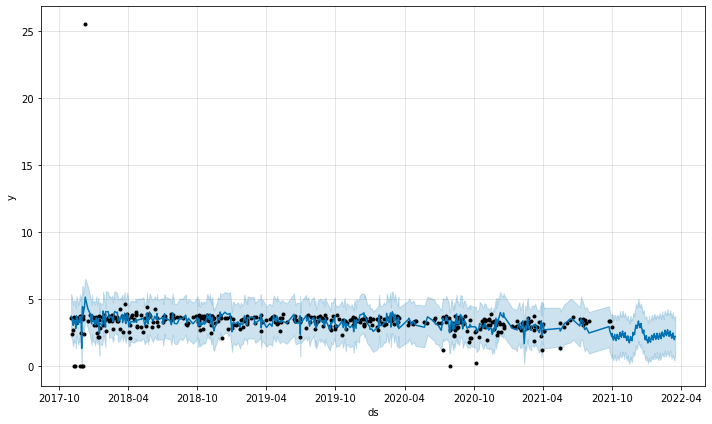

In [24]:
fig1 = model2.plot(forecast2)

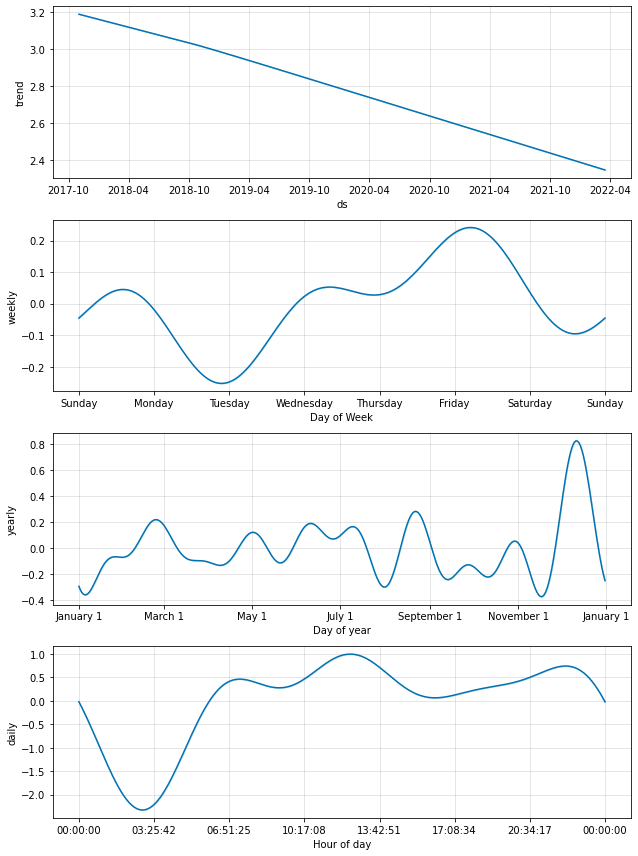

In [25]:
fig2 = model2.plot_components(forecast2)

In [26]:
df_sw3=df.loc[df['Tipo de atividade'].isin(['Corrida em esteira']),['Data','Velocidade']]
df_sw3.rename(columns={'Data': 'ds','Velocidade': 'y'}, inplace=True)
df_sw3=df_sw3.dropna()
model3=Prophet()
model3.fit(df_sw3)

In [27]:
future3 = model3.make_future_dataframe(periods=168)
future3.tail()

,ds
479,2022-03-15 10:19:49
480,2022-03-16 10:19:49
481,2022-03-17 10:19:49
482,2022-03-18 10:19:49
483,2022-03-19 10:19:49


In [28]:
forecast3 = model3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-12-13 17:57:26,3.676117,3.136625,4.237053
1,2017-12-22 15:42:28,3.665669,3.115487,4.202998
2,2018-01-08 18:06:20,3.338296,2.810442,3.930279
3,2018-01-17 17:05:38,3.179415,2.643857,3.712558
4,2018-01-26 20:25:20,3.170567,2.639532,3.675942


In [29]:
df_sw3.tail()

,ds,y
2431,2018-01-26 20:25:20,3.434343
2435,2018-01-17 17:05:38,3.418839
2442,2018-01-08 18:06:20,3.570804
2452,2017-12-22 15:42:28,3.597536
2455,2017-12-13 17:57:26,3.386139


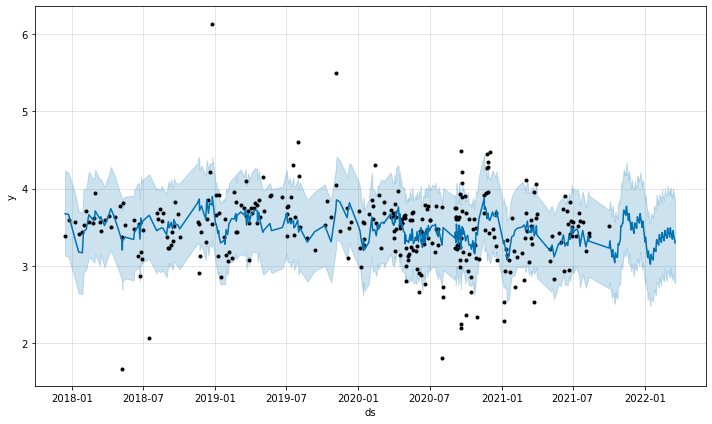

In [30]:
fig1 = model3.plot(forecast3)

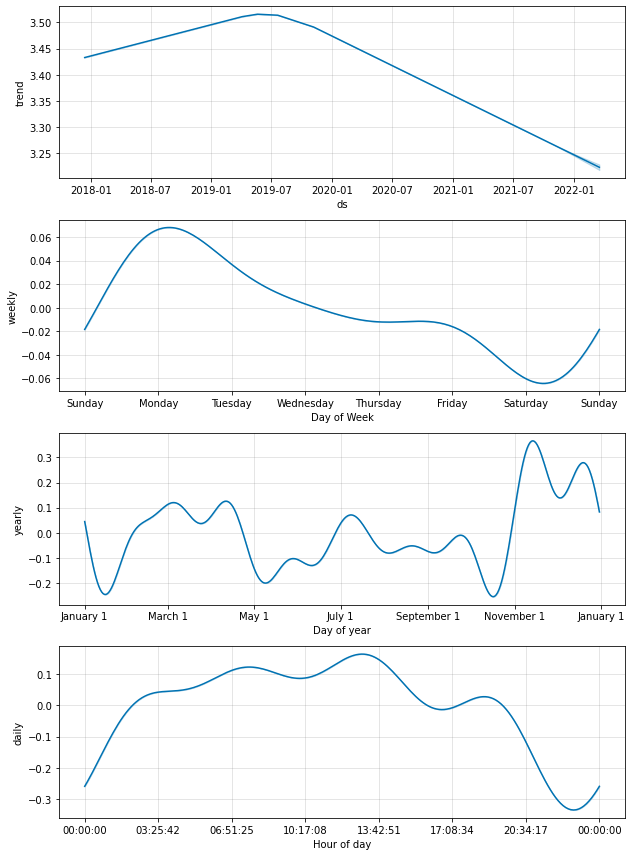

In [31]:
fig2 = model3.plot_components(forecast3)

In [36]:
from prophet.diagnostics import cross_validation
df_cv3 = cross_validation(model3, initial='365 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2019-04-11 10:19:49 and 2020-10-02 10:19:49


  0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
df_cv3.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-12 08:15:30,3.814646,3.424296,4.218560,3.809685,2019-04-11 10:19:49
1,2019-04-18 11:44:43,3.802301,3.401047,4.150909,3.784680,2019-04-11 10:19:49
2,2019-04-18 16:39:41,3.024879,2.639965,3.393610,3.550271,2019-04-11 10:19:49
3,2019-04-22 06:19:42,3.683441,3.275428,4.074599,3.855377,2019-04-11 10:19:49
4,2019-04-24 08:12:56,3.599356,3.202719,4.006730,3.631952,2019-04-11 10:19:49


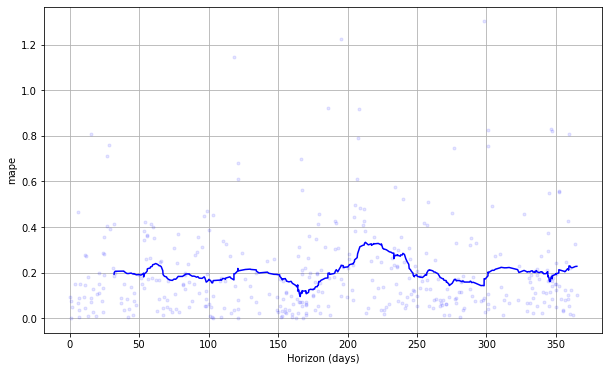

In [38]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv3, metric='mape')

In [39]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv2)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,36 days 01:51:03,0.539237,0.734327,0.569197,0.157724,0.198778,0.974359
1,38 days 01:36:29,0.554044,0.744342,0.579937,0.157748,0.202515,0.974359
2,39 days 02:30:38,0.555480,0.745305,0.581155,0.157748,0.203725,0.974359
3,40 days 02:02:54,0.583285,0.763731,0.598485,0.157748,0.209301,0.974359
4,40 days 13:56:04,0.591456,0.769062,0.607586,0.179428,0.212639,0.974359
